In [1]:
import re 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

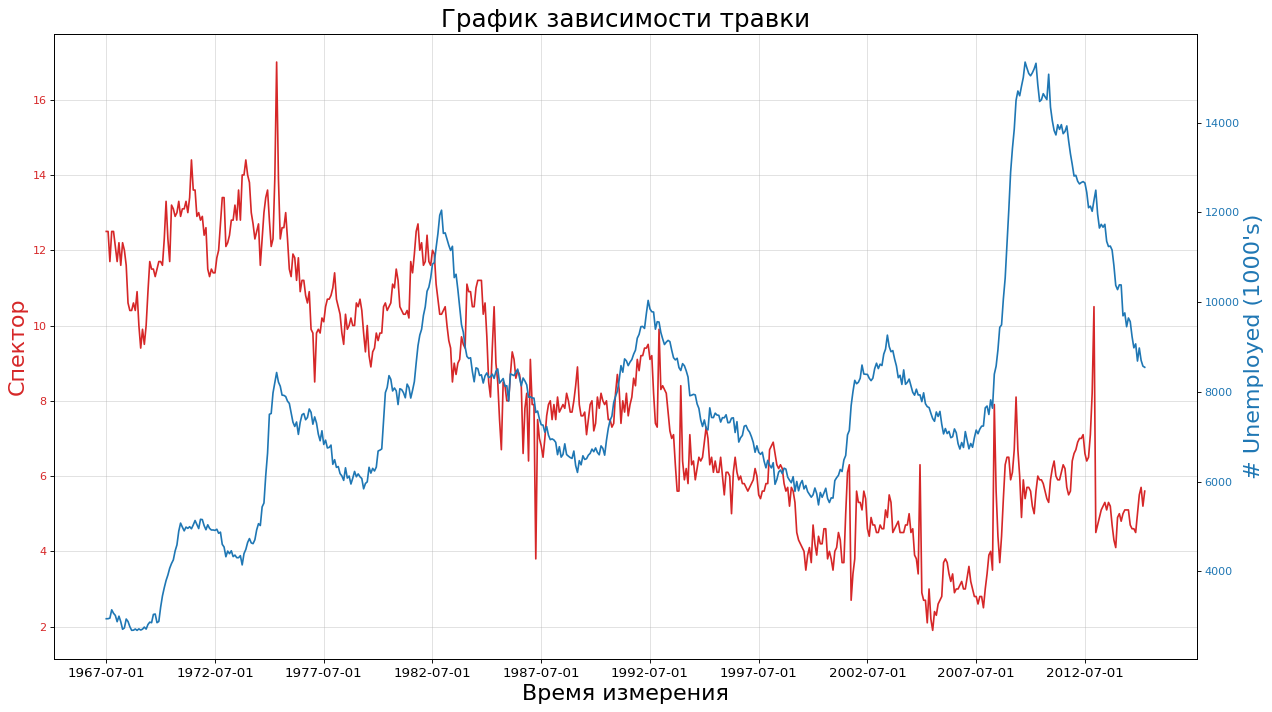

In [2]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")

x  = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Время измерения', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Спектор', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("График зависимости травки", fontsize=22)
fig.tight_layout()
plt.show()

строка[ >>>>>Begin Spectral Data<<<<< ]заканчивается с позиции 399
399 29643

198.437	-2266.67
198.909	606.06
199.38	397.53
199.852	114.14
200.324	238.89
200.795	270.06
201.267	314.98
201.739	335.27
202.21	412.18
202.682	373.96
203.153	299.19
203.625	315.96
204.096	277.48
204.568	310.78
205.039	268.38
205.51	287.28
205.982	248.11
206.453	267.62
206.924	226.13
207.396	208.12
207.867	179.65
208.338	216.23
208.809	190.12
209.28	246.18
209.751	292.24
210.222	389.9
210.694	449.69
211.165	1427.08
211.636	423.81
212.106	457.25
212.577	295.56
213.048	223.02
213.519	176.67
213.99	195.29
214.461	207.2
214.932	247.97
215.402	414.81
215.873	333.92
216.344	400.62
216.814	301.96
217.285	257.38
217.756	248.46
218.226	312.44
218.697	441.83
219.167	440.56
219.638	479.89
220.108	582.31
220.579	731.31
221.049	549.57
221.519	682.29
221.99	758.97
222.46	472.65
222.93	376.34
223.401	322.51
223.871	373.23
224.341	600.85
224.811	1435.56
225.281	-957.41
225.751	-374.6
226.221	-203.65
226.691	-634.72
227.161	-4

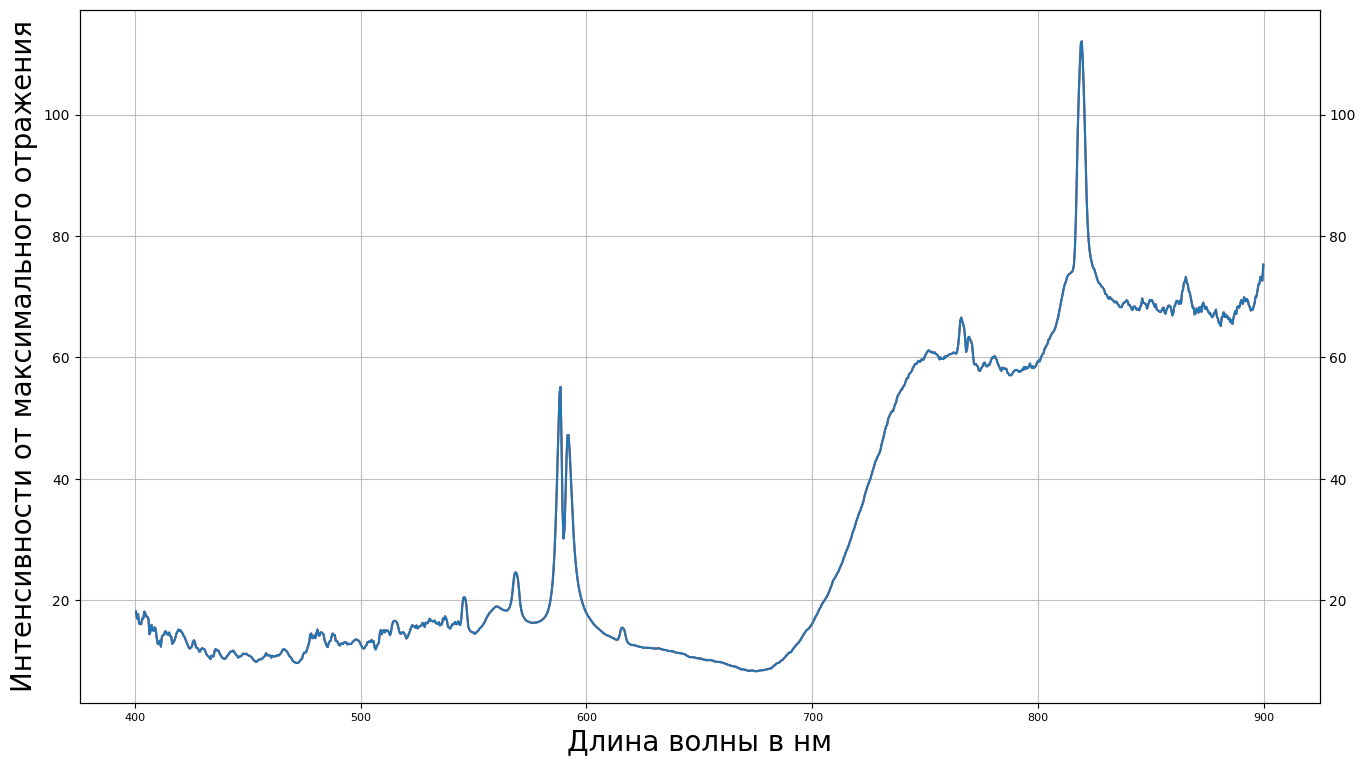

In [9]:
with open('data_sorted/V+/28DAYS/health/4_week_all_vplus_health_Reflection__6__13-55-42-948.txt', 'r') as file:
    data = file.read().rstrip()

for m in re.finditer(r'>>>>>Begin Spectral Data<<<<<', data): 
    print('строка[', m[0], ']заканчивается с позиции', m.end())

print(str(m.end()) + " " + str(len(data)))

str_result = ""

for index in range(m.end(), len(data)):
    str_result += data[index]

print(str(str_result))

result_x = []
result_y = []

reg_result = re.split(r'(\d{0,6}\.?\d{0,6})(\s{0,6})(\-?\d{0,6}\.?\d{0,6})', str_result)

reg_result_updated = [value for value in reg_result if value != "\t" and value != "\n" and value != '']


skip = False
for i in range(0, len(reg_result_updated)):
    if(skip == False):
        value = float(reg_result_updated[i])
        if i % 2 == 0:
            if(value >= 400.0 and value <= 900.0):
                result_x.append(value)
            else:
                skip = True
        else:
            if(value > 120):
                value = 120
            if(value < 0):
                value = 0
            result_y.append(value)
    else:
        skip = False
        


assert(len(result_x) == len(result_y))


# print(result_x)
# print(result_y)

pd_x = pd.array(result_x)
pd_y = pd.array(result_y)

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 100)
ax1.plot(pd_x, pd_y, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(pd_x, pd_y, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Длина волны в нм', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=8)

ax1.set_ylabel('Интенсивности от максимального отражения',  fontsize=20)
ax1.tick_params(axis='y', rotation=0)
ax1.grid(alpha=.8)

plt.show()